In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wind_dir = 'C:/Users/Li Hang/OneDrive - CivilEng/8_Desktop/Wind Turbine Simulation/SCADA/安生部'


In [3]:
mast_data = '功率测风塔（50m80m）201504-201610/80/20150322-20150329-龙凤大唐风电场-测风数据指标.xls'

mast_wind_data = pd.read_excel(f'{wind_dir}/{mast_data}', )
mast_wind_data

,日期,时间,风速最大值(m/s),风速最小值(m/s),风速平均值(m/s),风速标准偏差(m/s),瞬时风速(m/s),平均风向(°),瞬时风向(°)
0,2015-03-22,00:00,1.58,0.00,0.95,0.77,0.00,32.7,0.0
1,2015-03-22,00:05,1.43,0.00,1.14,0.57,1.43,45.2,56.5
2,2015-03-22,00:10,1.43,1.43,1.43,0.00,1.43,56.5,56.5
3,2015-03-22,00:15,1.44,1.43,1.43,0.00,1.44,58.9,68.5
4,2015-03-22,00:20,1.44,1.44,1.44,0.00,1.44,68.5,68.5
...,...,...,...,...,...,...,...,...,...
2299,2015-03-29,23:35,7.70,0.00,4.62,3.77,7.70,110.7,184.5
2300,2015-03-29,23:40,7.70,0.00,4.62,3.77,0.00,110.7,0.0
2301,2015-03-29,23:45,7.70,0.00,4.62,3.77,0.00,110.7,0.0
2302,2015-03-29,23:50,7.60,0.00,4.56,3.72,7.60,111.3,185.5


In [4]:
operation_data_1 = '黄岛机组数据/运行数据/1.xlsx'

operation_turbine_data_1 = pd.read_excel(f'{wind_dir}/{operation_data_1}', )
operation_turbine_data_1

,时间,Active power (千瓦),Pitch Angle (°),Rotor Speed (转速),Torque Setpoint (牛米),Wind dir (°),Wind Speed (米/秒)
0,2016-10-22 15:20:00,544.92578,0.56246,14.80759,3403.86597,147.71837,7.66902
1,2016-10-22 15:15:00,576.04333,0.64789,14.75651,3606.58691,146.76469,8.14321
2,2016-10-22 15:10:00,600.43372,0.27448,15.38743,3605.57886,169.33704,7.66176
3,2016-10-22 15:05:00,942.33215,1.09387,16.50344,5257.56396,147.19444,9.43495
4,2016-10-22 15:00:00,822.29297,1.50980,15.80854,4780.68652,143.97032,9.08192
...,...,...,...,...,...,...,...
1920,2016-10-11 21:55:00,-2.61300,2.87138,9.81474,0.00000,220.32138,2.14827
1921,2016-10-11 21:50:00,-2.61300,2.73552,9.68259,0.00000,187.59047,2.11036
1922,2016-10-11 21:45:00,-4.51472,0.05195,10.86511,18.52577,131.47836,2.64232
1923,2016-10-11 21:40:00,-5.21383,0.04466,11.23736,62.87933,79.78602,2.92921


In [5]:
operation_turbine_data_1.columns

Index(['时间', 'Active power  (千瓦)', 'Pitch Angle (°)', 'Rotor Speed (转速)',
       'Torque Setpoint (牛米)', 'Wind dir (°)', 'Wind Speed (米/秒)'],
      dtype='object')

In [6]:
def tp_label_generator(operation_data):
    day_label = sorted([d.date().isoformat() for d in operation_data['时间']])
    return [[day_label.index(day) for day in sorted(list(set(day_label)))], sorted(list(set(day_label)))]

tp_xlabel_1 = tp_label_generator(operation_turbine_data_1)
tp_xlabel_1

[[0, 29, 317, 605, 699, 791, 920, 1164, 1452, 1740],
 ['2016-10-11',
  '2016-10-12',
  '2016-10-13',
  '2016-10-14',
  '2016-10-16',
  '2016-10-17',
  '2016-10-19',
  '2016-10-20',
  '2016-10-21',
  '2016-10-22']]

In [7]:
tp = datetime.datetime.fromisoformat('2016-10-11 21:35:00')
tp

datetime.datetime(2016, 10, 11, 21, 35)

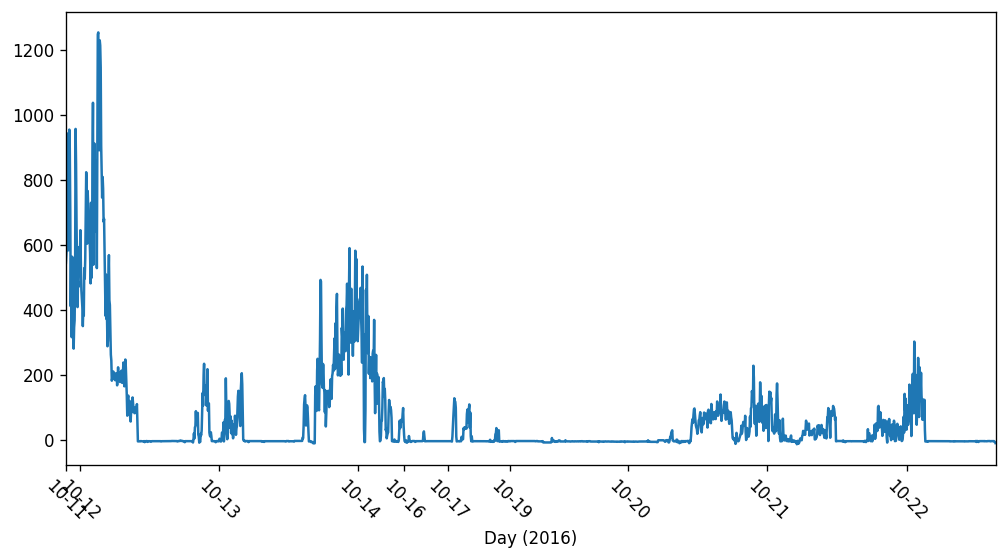

In [8]:
def data_plot(data, tp_label):
    fig = plt.figure(figsize=(10, 5), dpi=120)
    ax = fig.add_subplot(111)
    tp_time = np.arange(len(data))
    ax.plot(tp_time, data, )
    ax.set_xlabel('Day (2016)')
    ax.set_xlim((0, len(data)))
    ax.set_xticks(tp_label[0])
    tp_xticklabels = [day[5:] for day in tp_label[1]]
    # tp_xticklabels = ['\n'.join([day[5:7], day[8:10]]) for day in tp_label[1]]
    ax.set_xticklabels(tp_xticklabels, rotation=-45)
    plt.show()

data_plot(operation_turbine_data_1['Active power  (千瓦)'], tp_xlabel_1)

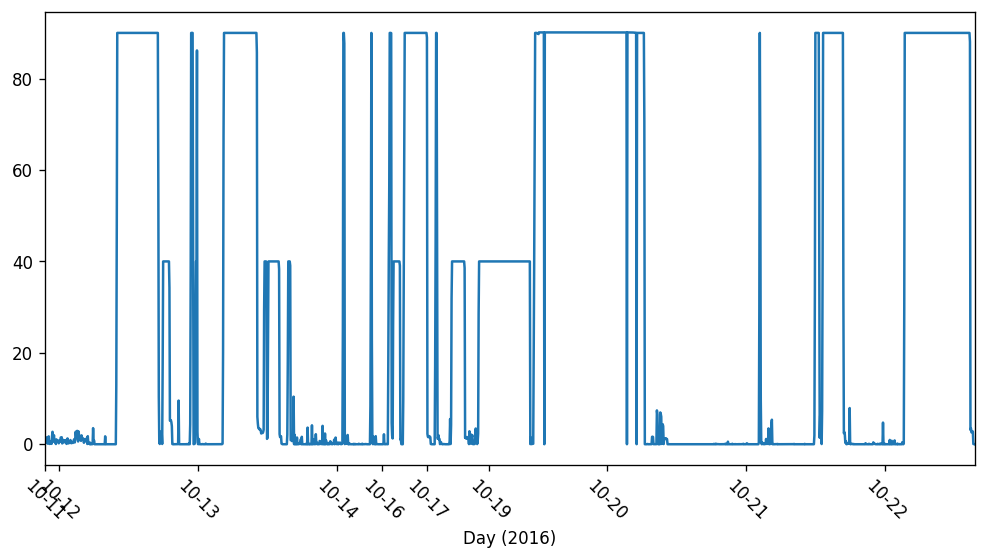

In [9]:
data_plot(operation_turbine_data_1['Pitch Angle (°)'], tp_xlabel_1)

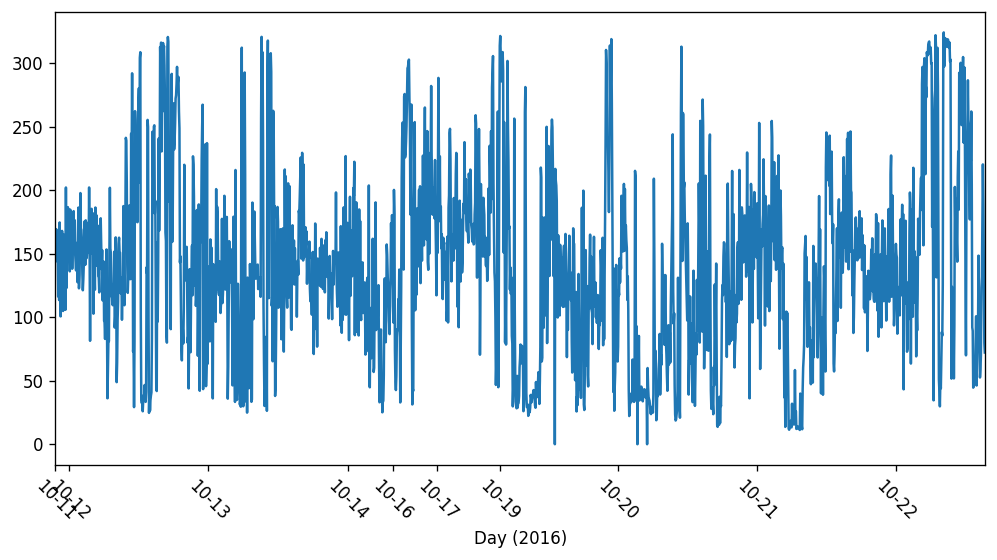

In [10]:
data_plot(operation_turbine_data_1['Wind dir (°)'], tp_xlabel_1)

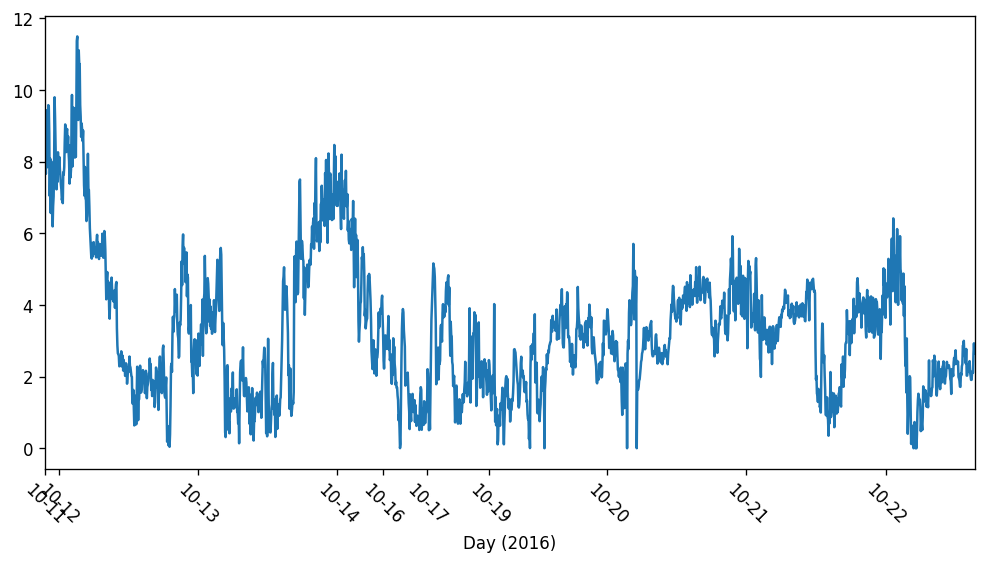

In [11]:
data_plot(operation_turbine_data_1['Wind Speed (米/秒)'], tp_xlabel_1)

In [12]:
huangdao_data = '黄岛机组数据/大唐黄岛风电场/黄岛 一期/A01/#1/Logs5m/s161022.txt'

huangdao_operation_data = pd.read_csv(f'{wind_dir}/{huangdao_data}', sep=';')
huangdao_operation_data

,createTime,collectTime,WTUR.WP4000Idl.avgVal.f,WTUR.WP4000Idl.minVal.f,WTUR.WP4000Idl.maxVal.f,WTUR.WP4000Idl.sdvVal.f,WTUR.WP4000Tmp.avgVal.f,WTUR.WP4000Tmp.minVal.f,WTUR.WP4000Tmp.maxVal.f,WTUR.WP4000Tmp.sdvVal.f,...,B_ToPM_P_Sp_kW.maxVal.f,B_ToPM_P_Sp_kW.sdvVal.f,B_ToPM_Q_Sp_kVAr.avgVal.f,B_ToPM_Q_Sp_kVAr.minVal.f,B_ToPM_Q_Sp_kVAr.maxVal.f,B_ToPM_Q_Sp_kVAr.sdvVal.f,V_PR_ReducedSetPointStatus_kW.avgVal.f,V_PR_ReducedSetPointStatus_kW.minVal.f,V_PR_ReducedSetPointStatus_kW.maxVal.f,V_PR_ReducedSetPointStatus_kW.sdvVal.f
0,15-5-1 9:15:00,16-10-22 3:31:17,45.160287,0.0,50.0,5.517476,38.229720,38.1,38.3,0.085353,...,1540.0,0.0,0.0,0.0,0.0,0.0,1540.0,1540.0,1540.0,0.0
1,15-5-1 9:20:00,16-10-22 3:31:17,45.217081,0.0,51.0,7.424730,38.231741,38.1,38.4,0.080304,...,1540.0,0.0,0.0,0.0,0.0,0.0,1540.0,1540.0,1540.0,0.0
2,15-5-1 9:25:00,16-10-22 3:31:17,46.280557,0.0,51.0,4.451115,38.244721,38.1,38.3,0.050459,...,1540.0,0.0,0.0,0.0,0.0,0.0,1540.0,1540.0,1540.0,0.0
3,15-5-1 9:30:00,16-10-22 3:31:17,44.701576,6.0,50.0,6.194226,38.272954,38.1,38.4,0.053077,...,1540.0,0.0,0.0,0.0,0.0,0.0,1540.0,1540.0,1540.0,0.0
4,15-5-1 9:35:00,16-10-22 3:31:17,44.845229,0.0,50.0,6.253927,38.260597,38.1,38.4,0.052633,...,1540.0,0.0,0.0,0.0,0.0,0.0,1540.0,1540.0,1540.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5741,16-10-22 15:00:00,16-10-22 7:22:27,27.493630,0.0,35.0,9.878002,36.849902,36.8,36.9,0.050000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5742,16-10-22 15:05:00,16-10-22 7:22:27,28.590187,0.0,35.0,6.269281,36.814834,36.7,37.0,0.051702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5743,16-10-22 15:10:00,16-10-22 7:22:27,30.356630,0.0,37.0,6.338374,36.753242,36.6,36.9,0.060643,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5744,16-10-22 15:15:00,16-10-22 7:22:27,29.845390,0.0,37.0,7.350864,36.634115,36.5,36.8,0.052265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
list(huangdao_operation_data.columns)

['createTime',
 'collectTime',
 'WTUR.WP4000Idl.avgVal.f',
 'WTUR.WP4000Idl.minVal.f',
 'WTUR.WP4000Idl.maxVal.f',
 'WTUR.WP4000Idl.sdvVal.f',
 'WTUR.WP4000Tmp.avgVal.f',
 'WTUR.WP4000Tmp.minVal.f',
 'WTUR.WP4000Tmp.maxVal.f',
 'WTUR.WP4000Tmp.sdvVal.f',
 '1.3.PVNet.avgVal.f',
 '1.3.PVNet.minVal.f',
 '1.3.PVNet.maxVal.f',
 '1.3.PVNet.sdvVal.f',
 'WGDC.TrfGri.PwrAt.cVal.avgVal.f',
 'WGDC.TrfGri.PwrAt.cVal.minVal.f',
 'WGDC.TrfGri.PwrAt.cVal.maxVal.f',
 'WGDC.TrfGri.PwrAt.cVal.sdvVal.f',
 'WGDC.TrfGri.PwrReact.avgVal.avgVal.f',
 'WGDC.TrfGri.PwrReact.avgVal.minVal.f',
 'WGDC.TrfGri.PwrReact.avgVal.maxVal.f',
 'WGDC.TrfGri.PwrReact.avgVal.sdvVal.f',
 '1.3.PIAvg_32.avgVal.f',
 '1.3.PIAvg_32.minVal.f',
 '1.3.PIAvg_32.maxVal.f',
 '1.3.PIAvg_32.sdvVal.f',
 '1.3.NQFlicker.avgVal.f',
 '1.3.NQFlicker.minVal.f',
 '1.3.NQFlicker.maxVal.f',
 '1.3.NQFlicker.sdvVal.f',
 'V_WindSpeed10MinLog.avgVal.f',
 'V_WindSpeed10MinLog.minVal.f',
 'V_WindSpeed10MinLog.maxVal.f',
 'V_WindSpeed10MinLog.sdvVal.f',
 

In [18]:
import os
from pathlib import Path

In [27]:
huangdao_data = Path(f'{wind_dir}/黄岛机组数据/大唐黄岛风电场/黄岛 一期')

huangdao_data

WindowsPath('C:/Users/Li Hang/OneDrive - CivilEng/8_Desktop/Wind Turbine Simulation/SCADA/安生部/黄岛机组数据/大唐黄岛风电场/黄岛 一期')

In [39]:
operation_data = [list(list(list(d.iterdir())[0].iterdir())[0].glob('*.txt'))[0] for d in huangdao_data.iterdir() if d.is_dir()]

for od in operation_data:
    print('/'.join(od.parts[-4:]))

A01/#1/Logs5m/s161022.txt
A02/#2/Logs5m/s161022.txt
A03/#3/Logs5m/s161022.txt
A04/#4/Logs5m/s161022.txt
A05/#5/Logs5m/s161022.txt
A06/#6/Logs5m/s161022.txt
A07/#7/Logs5m/s161022.txt
A08/#8/Logs5m/s150912.txt
A09/#9/Logs5m/s150912.txt
A10/#10/Logs5m/s161017.txt
A11/#11/Logs5m/s150912.txt
A12/#12/Logs5m/s151211.txt


In [ ]:
variable_name = [
    'createTime',
    'collectTime',
    
]